In [16]:
# Ashishkumar Pemmaraju
# DS 489 - Final Project Python Code
# WIU ID: 923-19-4632

In [17]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Setting up asethetics
pd.set_option("display.float_format", lambda x: "%.4f" % x)
np.set_printoptions(precision=4, suppress=True)
def print(*args):
    __builtins__.print(*("%.3f" % a if isinstance(a, float) else a
                         for a in args))

In [18]:
#Reading Data 
data = pd.read_csv(r"C:\Users\91973\Desktop\Ds489 Final\wine.data.csv")

#Feature PreProcessing - Removing Missing Values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)
data=data.dropna()
data.head()

Missing values in each column:
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total Phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color Intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
Number of bottles               0
dtype: int64


,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline,Number of bottles
0,14.2300,1.7100,2.4300,15.6000,127,2.8000,3.0600,0.2800,2.2900,5.6400,1.0400,3.9200,1065,23
1,13.2000,1.7800,2.1400,11.2000,100,2.6500,2.7600,0.2600,1.2800,4.3800,1.0500,3.4000,1050,123
2,13.1600,2.3600,2.6700,18.6000,101,2.8000,3.2400,0.3000,2.8100,5.6800,1.0300,3.1700,1185,137
3,14.3700,1.9500,2.5000,16.8000,113,3.8500,3.4900,0.2400,2.1800,7.8000,0.8600,3.4500,1480,109
4,13.2400,2.5900,2.8700,21.0000,118,2.8000,2.6900,0.3900,1.8200,4.3200,1.0400,2.9300,735,130


In [19]:
# Feature Selection -  Removing low variance columns

from sklearn import feature_selection

low_var = feature_selection.VarianceThreshold(threshold=0.05) #traditional value considered
low_var.fit_transform(data)
feature_var = data[data.columns[low_var.get_support(indices=True)]]

#Columns names dropped
drop_var = list(set(data.columns).difference(set(feature_var.columns)))

#Printing new feature data
print(feature_var)
print(drop_var)

     Alcohol  Malic Acid    Ash  Alcalinity of ash  Magnesium  Total Phenols  \
0    14.2300      1.7100 2.4300            15.6000        127         2.8000   
1    13.2000      1.7800 2.1400            11.2000        100         2.6500   
2    13.1600      2.3600 2.6700            18.6000        101         2.8000   
3    14.3700      1.9500 2.5000            16.8000        113         3.8500   
4    13.2400      2.5900 2.8700            21.0000        118         2.8000   
..       ...         ...    ...                ...        ...            ...   
173  13.7100      5.6500 2.4500            20.5000         95         1.6800   
174  13.4000      3.9100 2.4800            23.0000        102         1.8000   
175  13.2700      4.2800 2.2600            20.0000        120         1.5900   
176  13.1700      2.5900 2.3700            20.0000        120         1.6500   
177  14.1300      4.1000 2.7400            24.5000         96         2.0500   

     Flavanoids  Proanthocyanins  Color

In [20]:
#Feature Selection - Removing High Correlation Values

#Correlation feature function

def corr_feature(df, corr = 0.95):
  corr_matrix = df.corr(method='pearson')
  up_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape)).astype(bool)) # upper triangle
  corr_table = up_tri.stack().reset_index()
  corr_table.columns = ['First_Feature', 'Second_Feature', 'Correlation']
  corr_table = corr_table[corr_table['First_Feature'] != corr_table['Second_Feature']]
  corr_high = corr_table[np.abs(corr_table['Correlation']) >= corr] # list of dropped columns
  #data after dropping
  feature_corr = df.drop(corr_high['First_Feature'], axis=1)
  return feature_corr, corr_high

#Applying function to high variance data
feature_corr, drop_corr = corr_feature(feature_var)
print(drop_corr)

Empty DataFrame
Columns: [First_Feature, Second_Feature, Correlation]
Index: []


<Axes: >

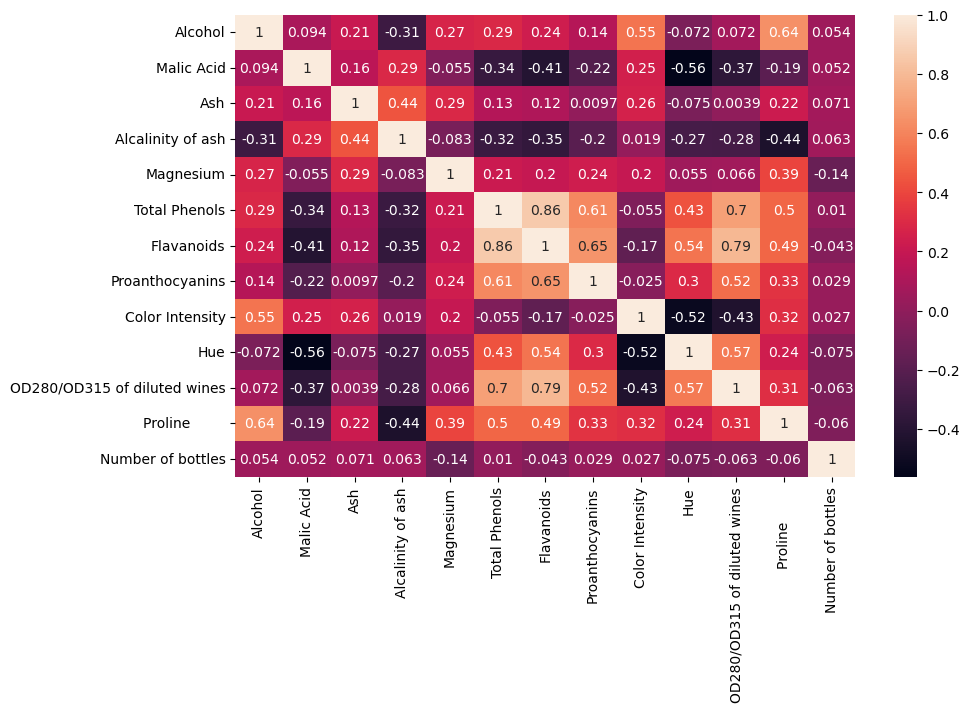

In [21]:
#To prove that there are no highly correlated variables
corr_matrix = feature_var.corr(method='pearson')

#Correlation Matrix Heatmap
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix,annot=True)

In [22]:
# Standardizing the fetaures after dropping low variance and highly correlated features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
feature_standardize = pd.DataFrame(scaler.fit_transform(feature_corr), columns = feature_corr.columns)

feature_standardize.describe()

#After standardizing, the data should have a mean of 0 and variance close to 1

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total Phenols,Flavanoids,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline,Number of bottles
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000
std,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028
min,-2.4342,-1.4330,-3.6792,-2.6710,-2.0883,-2.1072,-1.6960,-2.0690,-1.6343,-2.0947,-1.8951,-1.4932,-1.6931
25%,-0.7882,-0.6587,-0.5721,-0.6891,-0.8244,-0.8855,-0.8275,-0.5973,-0.7951,-0.7676,-0.9522,-0.7846,-0.8896
50%,0.0610,-0.4231,-0.0238,0.0015,-0.1223,0.0960,0.1061,-0.0629,-0.1592,0.0331,0.2377,-0.2337,0.0884
75%,0.8361,0.6698,0.6981,0.6021,0.5096,0.8090,0.8491,0.6292,0.4940,0.7132,0.7886,0.7582,0.8802
max,2.2598,3.1092,3.1563,3.1545,4.3714,2.5395,3.0628,3.4851,3.4354,3.3017,1.9609,2.9715,1.7535


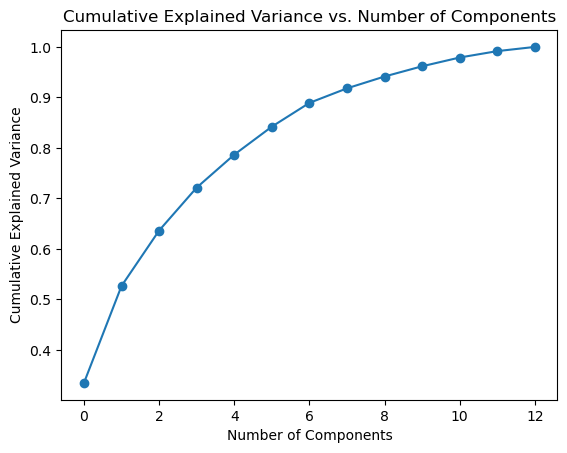

In [23]:
#Finding the number of components

from sklearn.decomposition import PCA

pca = PCA()
PCA1=pca.fit(feature_standardize)

#Plotting the PCA
plt.plot(np.cumsum(PCA1.explained_variance_ratio_),marker="o")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()

In [24]:
#PRINCIPAL COMPONENT ANALYSIS

from sklearn.decomposition import PCA

# Number of components are 4 as in the above graph, after 4 components the graph is showing lesser change.
pca_components = 4 
pca = PCA(n_components=pca_components)
feature_pca = pd.DataFrame(pca.fit_transform(data)) 
feature_pca 

,0,1,2,3
0,318.9659,-47.9650,19.3819,2.9479
1,302.6681,52.9719,-3.0425,7.0750
2,437.5105,68.1693,-3.5272,-0.7938
3,732.9125,42.3584,2.0662,-0.7031
4,-12.0480,56.3262,21.0018,-0.2325
...,...,...,...,...
173,-7.1657,22.4360,-3.5440,-2.3613
174,2.7793,42.2010,4.2164,-4.0881
175,89.0022,-65.7102,15.8945,-2.4993
176,93.7004,-29.7057,17.3803,-1.8763


In [25]:
# print individual components percentage explained variance
print("Percentage of the variance ", pca.explained_variance_ratio_[:4]*100)

# print overall percentage explained variance
print("Overall PCA explains {:.2f}% of the variance in features".format(pca.explained_variance_ratio_.sum()*100))
print("Raw explained variance", pca.explained_variance_)

Percentage of the variance  [97.9878  1.8282  0.1672  0.0093]
Overall PCA explains 99.99% of the variance in features
Raw explained variance [99208.5402  1850.9453   169.2462     9.3935]


C:\Users\91973\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91973\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91973\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91973\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

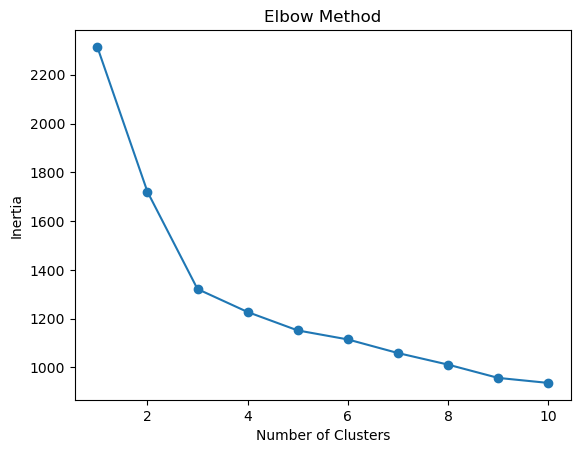

In [26]:
# Finding number of clusters
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(feature_standardize)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

C:\Users\91973\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91973\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91973\anaconda1\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


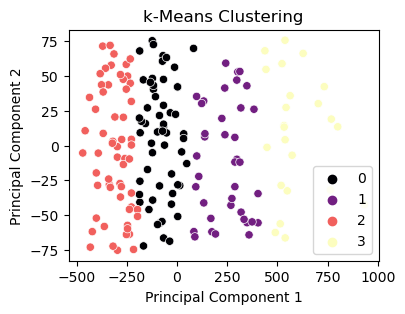

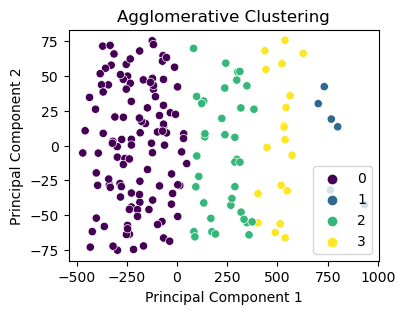

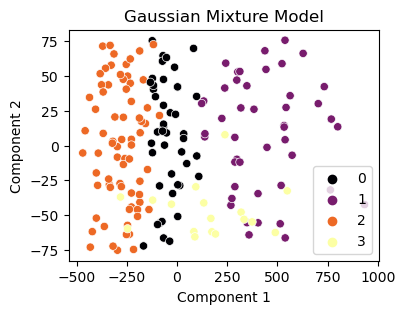

In [27]:
#The number of clusters is found out to be 4
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns


# Allocating data
clustering_data = feature_pca
# Converting DataFrame to NumPy array
clustering_data_array = clustering_data.values if isinstance(clustering_data, pd.DataFrame) else clustering_data

# Number of clusters
k = 4

labels_kmeans = []
labels_agg = []
labels_gauss = []

# k-Means clustering
obj_kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2024)
labels_kmeans = obj_kmeans.fit_predict(clustering_data)

# Agglomerative Clustering
obj_agg = AgglomerativeClustering(n_clusters=k, linkage='average')
labels_agg = obj_agg.fit_predict(clustering_data)

# Gaussian Mixture Models
obj_gauss = GaussianMixture(n_components=k, covariance_type='full', random_state=2024)
labels_gauss = obj_gauss.fit_predict(clustering_data)

# Scatter plot for k-Means clustering
plt.figure(figsize=(4, 3))
sns.scatterplot(x=clustering_data_array[:, 0], y=clustering_data_array[:, 1], hue=labels_kmeans, palette='magma', legend='full')
plt.title('k-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Scatter plot for Agglomerative Clustering
plt.figure(figsize=(4, 3))
sns.scatterplot(x=clustering_data_array[:, 0], y=clustering_data_array[:, 1], hue=labels_agg, palette='viridis', legend='full')
plt.title('Agglomerative Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Scatter plot for Gaussian Mixture Model
plt.figure(figsize=(4,3))
sns.scatterplot(x=clustering_data_array[:, 0], y=clustering_data_array[:, 1], hue=labels_gauss, palette='inferno', legend='full')
plt.title('Gaussian Mixture Model')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

In [28]:
#Statistical Summary of the data
data['Number of bottles'].describe().T

count   178.0000
mean     72.7022
std      43.0621
min       0.0000
25%      34.5000
50%      76.5000
75%     110.5000
max     148.0000
Name: Number of bottles, dtype: float64

In [29]:
#Negative Binomial Count Variable Regression
import statsmodels.api as sm
X = data.drop('Number of bottles',axis=1)
y = data['Number of bottles']
#As the variance of the data does exceeds the mean, we can use Negative Binomial Regression
nbr = sm.GLM(y, X, family=sm.families.NegativeBinomial()).fit()
print(nbr.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:      Number of bottles   No. Observations:                  178
Model:                            GLM   Df Residuals:                      165
Model Family:        NegativeBinomial   Df Model:                           12
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -939.63
Date:                Tue, 07 May 2024   Deviance:                       114.08
Time:                        22:41:00   Pearson chi2:                     65.0
No. Iterations:                     8   Pseudo R-squ. (CS):            0.02841
Covariance Type:            nonrobust                                         
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Alcohol         

C:\Users\91973\anaconda1\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
